In [52]:
from simphony_osp.namespaces import city, owl,foaf, rdfs, emmo#, dso_dome, owl, dcat
from ontopy import get_ontology

from simphony_osp.tools import semantic2dot, pretty_print
from simphony_osp.tools import search,  export_file, import_file, pretty_print, search
from simphony_osp.tools.search import sparql

from simphony_osp.ontology import RESTRICTION_QUANTIFIER, RESTRICTION_TYPE, OntologyIndividual
from simphony_osp.ontology.relationship import OntologyRelationship

from simphony_osp.session import Session, core_session

import owlready2

# Purpose
Test how we can use rdflib and/or owlready2 for ontology management. Turns out we can, just need to have the ontology on rdf/xml not ttl, then we can read it in, see below example at end of this file. Moreover, rdflib can be used to also manage ontology using example the owl:a relation which can be used to define classes. 

In [2]:
haifa  = city.City(name='haifa', coordinates=[0,0])
Mezna  = city.Citizen(name="Mezna", age=66)
Kalish = city.Citizen(name="Kalish", age=55)

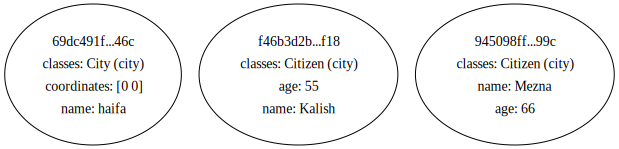

In [3]:
semantic2dot(core_session)

In [4]:
haifa.connect(Kalish, rel=city.hasMajor)

In [5]:
pretty_print(haifa)

- Ontology individual:
  identifier: 69dc491f-d713-4a11-aa23-0fe399e0046c
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
     - Ontology individual of class Citizen
        identifier: f46b3d2b-6214-429e-a2a6-44888d0cdf18
         age: 55
         name: Kalish


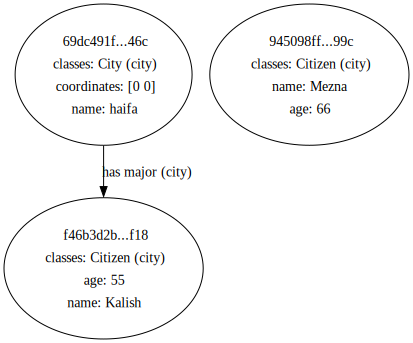

In [6]:
semantic2dot(core_session)

In [7]:
def triple(s=OntologyIndividual, p=OntologyRelationship, o=OntologyIndividual):
    s.connect(o, rel=p)
    return(s)

In [8]:
haifa.connect(Mezna, rel=city.hasMajor)

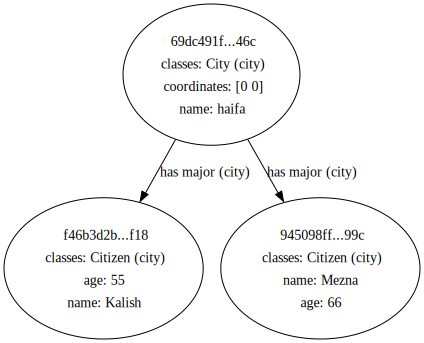

In [9]:
semantic2dot(core_session)

In [10]:
pretty_print(haifa)

- Ontology individual:
  identifier: 69dc491f-d713-4a11-aa23-0fe399e0046c
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
     - Ontology individual of class Citizen
      . identifier: 945098ff-380f-4400-b026-d1d70a23799c
      .  age: 66
      .  name: Mezna
     - Ontology individual of class Citizen
        identifier: f46b3d2b-6214-429e-a2a6-44888d0cdf18
         age: 55
         name: Kalish


In [11]:
neighborhoods = {
    city.Neighborhood(name=name, coordinates=coordinates)
    for name, coordinates in [
        ("The City", [47.99525, 7.84726]),
        ("Alperton", [47.99888, 7.83774]),
        ("Webmly Park", [48.00021, 7.86084]),
        ("Marylebone", [48.00779, 7.86268]),
        ("Battersea", [48.01684, 7.843]),
    ]
}

In [12]:
london = city.City(name='london', coordinates=[1,1])

In [13]:
pretty_print(london)

- Ontology individual:
  identifier: 03f23867-6d5b-47fc-8cd7-64ab682cf34f
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [1 1]
           name: london


In [14]:
for neighborhood in neighborhoods:
    london.connect(neighborhood, rel=city.hasPart) 

In [15]:
pretty_print(london)

- Ontology individual:
  identifier: 03f23867-6d5b-47fc-8cd7-64ab682cf34f
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [1 1]
           name: london
   |_Relationship has part (city ) (city):
     - Ontology individual of class Neighborhood
      . identifier: 11f909d7-fd24-4d66-862f-a4725378585b
      .  coordinates: [47.99525  7.84726]
      .  name: The City
     - Ontology individual of class Neighborhood
      . identifier: 54d1143e-f583-4fd5-8f26-2292824379c9
      .  coordinates: [47.99888  7.83774]
      .  name: Alperton
     - Ontology individual of class Neighborhood
      . identifier: b4943e0b-7983-4c3e-8384-a596cc8d179b
      .  coordinates: [48.01684  7.843  ]
      .  name: Battersea
     - Ontology individual of class Neighborhood
      . identifier: bdc24770-0480-4ed3-bfe9-18081b9babef
      .  coordinates: [48.00779  7.86268]
      .  name: Marylebone
     - Ontology indiv

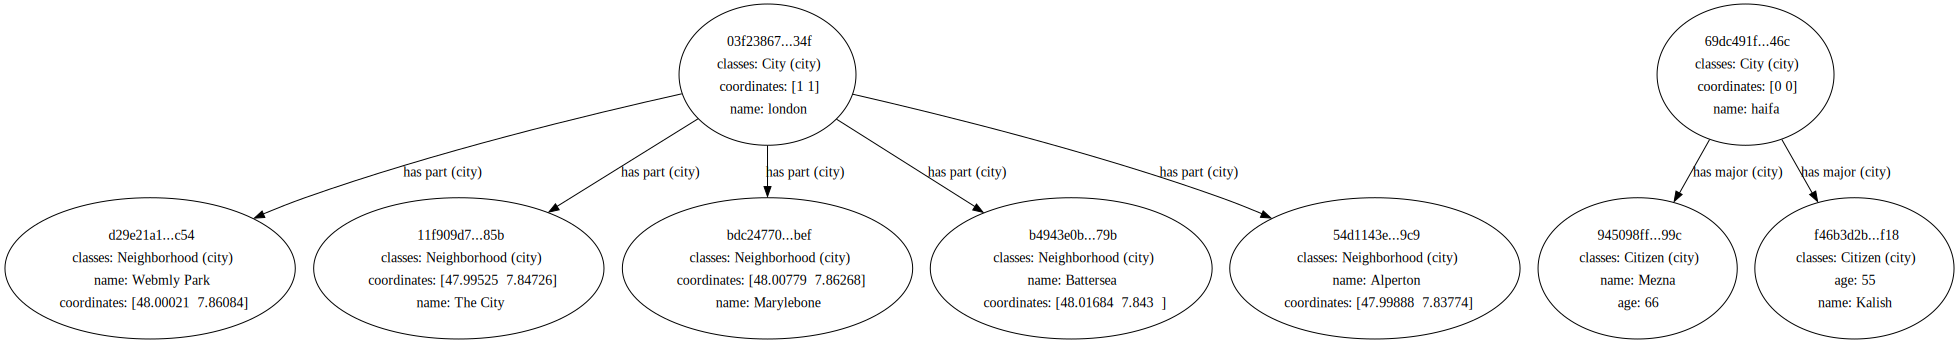

In [16]:
semantic2dot(core_session)

Now lets add Marylebone to haifa as well. 


In [17]:
print(type(neighborhoods))

<class 'set'>


In [18]:
for neighborhood in neighborhoods:
    if "Mary" in str(neighborhood.name):
        pretty_print (neighborhood)
        marylebone=neighborhood

- Ontology individual:
  identifier: bdc24770-0480-4ed3-bfe9-18081b9babef
  type: Neighborhood (city )
  superclasses: Neighborhood (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [48.00779  7.86268]
           name: Marylebone


In [19]:
pretty_print(marylebone) # just double check

- Ontology individual:
  identifier: bdc24770-0480-4ed3-bfe9-18081b9babef
  type: Neighborhood (city )
  superclasses: Neighborhood (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [48.00779  7.86268]
           name: Marylebone


In [20]:
haifa.connect(marylebone, rel=city.hasPart)

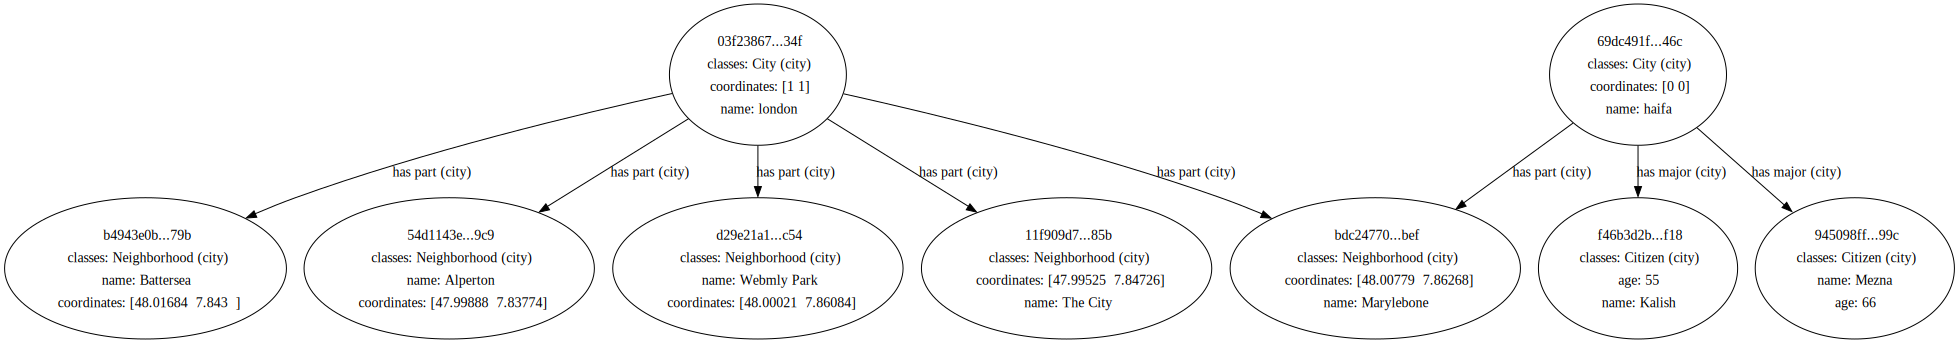

In [21]:
semantic2dot(core_session)

In [22]:
pretty_print(london)

- Ontology individual:
  identifier: 03f23867-6d5b-47fc-8cd7-64ab682cf34f
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [1 1]
           name: london
   |_Relationship has part (city ) (city):
     - Ontology individual of class Neighborhood
      . identifier: 11f909d7-fd24-4d66-862f-a4725378585b
      .  coordinates: [47.99525  7.84726]
      .  name: The City
     - Ontology individual of class Neighborhood
      . identifier: 54d1143e-f583-4fd5-8f26-2292824379c9
      .  coordinates: [47.99888  7.83774]
      .  name: Alperton
     - Ontology individual of class Neighborhood
      . identifier: b4943e0b-7983-4c3e-8384-a596cc8d179b
      .  coordinates: [48.01684  7.843  ]
      .  name: Battersea
     - Ontology individual of class Neighborhood
      . identifier: bdc24770-0480-4ed3-bfe9-18081b9babef
      .  coordinates: [48.00779  7.86268]
      .  name: Marylebone
     - Ontology indiv

In [23]:
pretty_print(haifa)

- Ontology individual:
  identifier: 69dc491f-d713-4a11-aa23-0fe399e0046c
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
   | - Ontology individual of class Citizen
   |  . identifier: 945098ff-380f-4400-b026-d1d70a23799c
   |  .  age: 66
   |  .  name: Mezna
   | - Ontology individual of class Citizen
   |    identifier: f46b3d2b-6214-429e-a2a6-44888d0cdf18
   |     age: 55
   |     name: Kalish
   |_Relationship has part (city ) (city):
     - Ontology individual of class Neighborhood
        identifier: bdc24770-0480-4ed3-bfe9-18081b9babef
         coordinates: [48.00779  7.86268]
         name: Marylebone


In [24]:
for neighborhood in neighborhoods:
    if "Bat" in str(neighborhood.name):
        pretty_print (neighborhood)
        bater=neighborhood

- Ontology individual:
  identifier: b4943e0b-7983-4c3e-8384-a596cc8d179b
  type: Neighborhood (city )
  superclasses: Neighborhood (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [48.01684  7.843  ]
           name: Battersea


In [25]:
bater

<OntologyIndividual: b4943e0b-7983-4c3e-8384-a596cc8d179b>

In [26]:
haifa.connect(bater, rel=city.hasPart)

In [27]:
pretty_print(haifa)

- Ontology individual:
  identifier: 69dc491f-d713-4a11-aa23-0fe399e0046c
  type: City (city )
  superclasses: City (city ), Populated Place (city ), Geographical Place (city ), Thing (owl )
  values:  coordinates: [0 0]
           name: haifa
   |_Relationship has major (city ) (city):
   | - Ontology individual of class Citizen
   |  . identifier: 945098ff-380f-4400-b026-d1d70a23799c
   |  .  age: 66
   |  .  name: Mezna
   | - Ontology individual of class Citizen
   |    identifier: f46b3d2b-6214-429e-a2a6-44888d0cdf18
   |     age: 55
   |     name: Kalish
   |_Relationship has part (city ) (city):
     - Ontology individual of class Neighborhood
      . identifier: b4943e0b-7983-4c3e-8384-a596cc8d179b
      .  coordinates: [48.01684  7.843  ]
      .  name: Battersea
     - Ontology individual of class Neighborhood
        identifier: bdc24770-0480-4ed3-bfe9-18081b9babef
         coordinates: [48.00779  7.86268]
         name: Marylebone


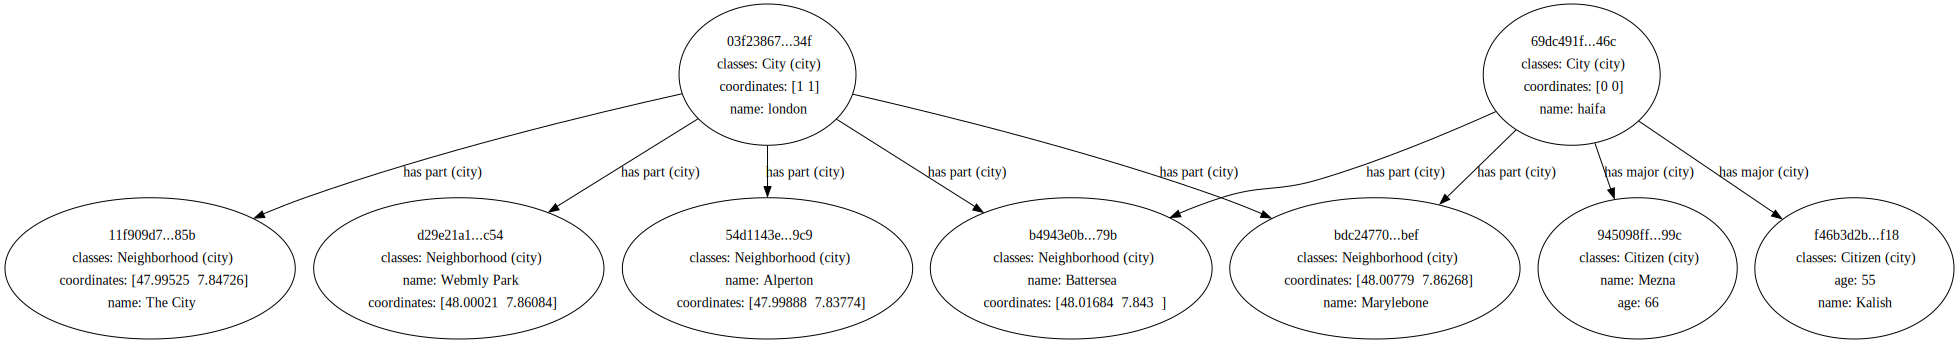

In [28]:
semantic2dot(core_session)

Now we have two CUDS, i.e., london and haifa, lets save each into a different ttl

In [29]:
export_file(london, file='./london.ttl', format='turtle', all_triples = True, all_statements=True)

In [30]:
export_file(haifa, file='./haifa.ttl', format='turtle')

In [31]:
export_file(core_session, file="./sigradB.ttl", format="turtle", all_triples=True, all_statements=True)

In [32]:
ds1=emmo.DataSet()


In [33]:
pretty_print(ds1)

- Ontology individual:
  identifier: f7e29349-0560-4076-8036-b31963a10fab
  type: DataSet (emmo )
  superclasses: DataSet (emmo ), EncodedData (emmo ), Data (emmo ), Perspective (emmo ), CausalStructure (emmo ), Item (emmo ), EMMO (emmo ), Thing (owl )


In [34]:
emmo_ontology=owlready2.get_ontology("https://protege.stanford.edu/ontologies/pizza/pizza.owl")

In [35]:
emmo_ontology.load()

get_ontology("http://www.co-ode.org/ontologies/pizza/")

In [36]:
emmo_ontology.base_iri

'http://www.co-ode.org/ontologies/pizza/'

In [37]:
list(emmo_ontology.classes())

[pizza.Pizza,
 pizza.Pizza Base,
 pizza.Food,
 pizza.Spiciness,
 pizza.Pizza Topping,
 pizza.American,
 pizza.PizzaComUmNome,
 pizza.Mozzarella,
 pizza.Peperoni Sausage,
 pizza.Tomato,
 pizza.American Hot,
 pizza.Hot Green Pepper,
 pizza.Jalapeno Pepper,
 pizza.Anchovies,
 pizza.Seafood,
 pizza.Artichoke,
 pizza.Vegetable Topping,
 pizza.Mild,
 pizza.Asparagus,
 pizza.Cajun,
 pizza.Onion,
 pizza.Peperonata,
 pizza.Prawns,
 pizza.Tobasco Pepper Sauce,
 pizza.Cajun Spice,
 pizza.Herb Spice,
 pizza.Hot,
 pizza.Rosemary,
 pizza.Caper,
 pizza.Capricciosa,
 pizza.Ham,
 pizza.Olive,
 pizza.Caprina,
 pizza.Goats Cheese,
 pizza.Sundried Tomato,
 pizza.Cheese,
 pizza.Cheesy Pizza,
 pizza.CheesyVegetableTopping,
 pizza.Chicken,
 pizza.Meat,
 pizza.Country,
 pizza.Domain Thing,
 pizza.Deep Pan Base,
 pizza.Thin And Crispy Base,
 pizza.Value Partition,
 pizza.Fiorentina,
 pizza.Garlic,
 pizza.Parmezan,
 pizza.Spinach,
 pizza.Four Cheeses,
 pizza.Four Seasons,
 pizza.Mushroom,
 pizza.Fruit,
 pizza.F

In [38]:
from owlready2 import * 

In [39]:
onto = owlready2.get_ontology("https://emmo-repo.github.io/versions/1.0.0-beta5/emmo-inferred.owl")

In [40]:
onto

get_ontology("https://emmo-repo.github.io/versions/1.0.0-beta5/emmo-inferred.owl#")

In [41]:
list(onto.classes())

[]

In [42]:
list(onto.classes())

[]

In [43]:
from ontopy import get_ontology



In [44]:
onto = get_ontology("https://emmo-repo.github.io/versions/1.0.0-beta4/emmo-inferred.ttl")

In [45]:
onto.load()

get_ontology("http://emmo.info/emmo-inferred#")

In [46]:
for e in onto.get_entities(classes=True, individuals=False, object_properties=False,data_properties=False, annotation_properties=False):
    print (e.prefLabel)

['SandMolds']
['FormingFromPowder']
['NeodymiumAtom']
['Declared']
['Atom']
['Newton']
['SISpecialUnit']
['CopperAtom']
['IndustrialTechnologyProcess']
['IntentionalProcess']
['NonEncodedData']
['Data']
['MaterialRelation']
['Equation']
['Agent']
['Participant']
['MathematicalFunction']
['DefiningEquation']
['PlutoniumAtom']
['Network']
['HolisticSystem']
['Quantum']
['CausalParticle']
['SulfurSymbol']
['ChemicalElement']
['AccelerationDimension']
['Datum']
['FrequencyDimension']
['TechnetiumAtom']
['BerylliumSymbol']
['ThroughTile']
['SpatioTemporalTile']
['Tessellation']
['MetrePerSecond']
['SICoherentDerivedUnit']
['Quantity']
['Role']
['UpQuark']
['HybridMatter']
['AngularMomentumDimension']
['MetrologicalSymbol']
['PhysicalDimension']
['PraseodymiumAtom']
['CobaltAtom']
['CaesiumAtom']
['MeasurementUncertainty']
['QuantitativeProperty']
['TinAtom']
['GalliumSymbol']
['CausalStructure']
['LutetiumAtom']
['NewtonianConstantOfGravityDimension']
['Hour']
['SIAcceptedSpecialUnit']
['Mi

['Nucleon']
['AbsorbedDose']
['AtomicAndNuclearPhysicsQuantity']
['GermaniumSymbol']
['Cognised']
['Foam']
['Colloid']
['Observer']
['ReferenceUnit']
['Hectare']
['Simulation']
['Estimation']
['Computation']
['ApplicationProgram']
['FunctionalIcon']
['Array3D']
['Auditory']
['BoltzmannConstant']
['SilverSymbol']
['ContinuumMaterial']
['Atto']
['Deducer']
['Interpreter']
['Work']
['OrganicCompound']
['ChemicalCompound']
['ElectricCharge']
['CausalPath']
['TantalumSymbol']
['InternalEnergy']
['Physicalistic']
['Tera']
['Mega']
['CompositeBoson']
['Hadron']
['SamariumAtom']
['ConstitutiveProcess']
['Proton']
['Gram']
['LanthanumSymbol']
['Torque']
['ErbiumSymbol']
['SIUnitSymbol']
['SolidAerosol']
['LogarithmicUnit']
['UnitOne']
['BlueBottomAntiQuark']
['BlueAntiQuark']
['GasSolution']
['AmericiumSymbol']
['Coulomb']
['Length']
['SpaceAndTimeQuantity']
['InternationalSystemOfQuantity']
['ElectronCharge']
['HotDipGalvanizing']
['CoatingManufacturing']
['RedStrangeAntiQuark']
['PhysicsBased

['AlgebricOperator']
['ReactiveMaterial']
['IndiumSymbol']
['Drilling']
['AstatineSymbol']
['Exa']
['DeepDrawing']
['MeasuringInstrument']
['ChromiumSymbol']
['DieCasting']
['Soldering']
['MathematicalModel']
['CausalInteraction']
['MachineCell']
['Measurer']
['Voltage']
['DataStructure']
['MuonAntiNeutrino']
['Curve']
['MolecularFormula']
['RutherfordiumAtom']
['Division']
['MultipleUnit']
['EuclideanSpace']
['ThreeManifold']
['PhysicsEquationSolution']
['Measurement']
['CausalConvexSystem']
['Muon']
['YttriumAtom']
['Presses']
['MassFractionUnit']
['SiliconAtom']
['AstronomicalUnit']
['AqueousSolution']
['ErbiumAtom']
['ElectricCurrentDensity']
['NiobiumSymbol']
['Experiment']
['EuropiumSymbol']
['DysprosiumAtom']
['GreenDownQuark']
['Sawing']
['ZeroManifold']
['ThalliumSymbol']
['Candela']
['Ampere']
['VanadiumSymbol']
['MoscoviumAtom']
['Cementing']
['BlueDownAntiQuark']
['HydrogenAtom']
['StrontiumAtom']
['Milli']
['LiquidSol']
['CoperniciumAtom']
['Tonne']
['RadiumSymbol']
['Nomi

In [47]:
list(onto.classes())

[emmo.SandMolds,
 emmo.FormingFromPowder,
 periodictable.NeodymiumAtom,
 emmo.Declared,
 emmo.Atom,
 emmo.Newton,
 emmo.SISpecialUnit,
 periodictable.CopperAtom,
 emmo.IndustrialTechnologyProcess,
 emmo.IntentionalProcess,
 emmo.NonEncodedData,
 emmo.Data,
 emmo.MaterialRelation,
 emmo.Equation,
 emmo.Agent,
 emmo.Participant,
 emmo.MathematicalFunction,
 emmo.DefiningEquation,
 periodictable.PlutoniumAtom,
 emmo.Network,
 emmo.HolisticSystem,
 emmo.Quantum,
 emmo.CausalParticle,
 periodictable.SulfurSymbol,
 emmo.ChemicalElement,
 emmo.AccelerationDimension,
 emmo.Datum,
 emmo.FrequencyDimension,
 periodictable.TechnetiumAtom,
 periodictable.BerylliumSymbol,
 emmo.ThroughTile,
 emmo.SpatioTemporalTile,
 emmo.Tessellation,
 emmo.MetrePerSecond,
 emmo.SICoherentDerivedUnit,
 emmo.Quantity,
 emmo.Role,
 emmo.UpQuark,
 emmo.HybridMatter,
 emmo.AngularMomentumDimension,
 emmo.MetrologicalSymbol,
 emmo.PhysicalDimension,
 periodictable.PraseodymiumAtom,
 periodictable.CobaltAtom,
 periodict

In [48]:
onto = owlready2.get_ontology("file:///Users/adham/dev/new/ontology/emmo-inferred-dome.owl")

In [49]:
onto.load()

get_ontology("http://emmo.info/emmodome#")

In [50]:
list(onto.classes())

[emmo-inferred-dome.Atom,
 emmo-inferred-dome.ChemicalElement,
 emmo-inferred-dome.Process,
 emmo-inferred-dome.Index,
 emmo-inferred-dome.Deducer,
 emmo-inferred-dome.ObjectiveProperty,
 emmo-inferred-dome.Declarer,
 emmo-inferred-dome.Declared,
 emmo-inferred-dome.IntentionalProcess,
 emmo-inferred-dome.ManufacturedProduct,
 emmo-inferred-dome.Product,
 emmo-inferred-dome.Status,
 emmo-inferred-dome.ConventionalProperty,
 emmo-inferred-dome.Deduced,
 emmo-inferred-dome.Redundant,
 emmo-inferred-dome.Mathematical,
 emmo-inferred-dome.Variable,
 emmo-inferred-dome.Object,
 emmo-inferred-dome.Cognised,
 emmo-inferred-dome.Icon,
 emmo-inferred-dome.HolisticSystem,
 emmo-inferred-dome.Component,
 emmo-inferred-dome.Service,
 emmo-inferred-dome.Sign,
 emmo-inferred-dome.Interpreter,
 emmo-inferred-dome.PrefixedUnit,
 emmo-inferred-dome.MetricPrefix,
 emmo-inferred-dome.Cogniser,
 emmo-inferred-dome.Whole,
 emmo-inferred-dome.Item,
 emmo-inferred-dome.NonTemporalRole,
 emmo-inferred-dome.Qu

In [53]:
rdfs.ontology